<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-processing-for-pet-detection" data-toc-modified-id="Data-processing-for-pet-detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data processing for pet detection</a></span></li><li><span><a href="#Read-the-data" data-toc-modified-id="Read-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the data</a></span></li><li><span><a href="#ML-Part" data-toc-modified-id="ML-Part-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML Part</a></span><ul class="toc-item"><li><span><a href="#ML---full-evaluation" data-toc-modified-id="ML---full-evaluation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ML - full evaluation</a></span></li><li><span><a href="#Let's-probe-preprocessing-methods-with-MLP" data-toc-modified-id="Let's-probe-preprocessing-methods-with-MLP-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Let's probe preprocessing methods with MLP</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></li><li><span><a href="#Let's-build-the-models-with-the-best-ML-methods" data-toc-modified-id="Let's-build-the-models-with-the-best-ML-methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Let's build the models with the best ML methods</a></span></li><li><span><a href="#Save-models-for-future-use" data-toc-modified-id="Save-models-for-future-use-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save models for future use</a></span></li><li><span><a href="#Reuse-saved-models-for-new-predictions" data-toc-modified-id="Reuse-saved-models-for-new-predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reuse saved models for new predictions</a></span></li></ul></div>

# Data processing for pet detection

Here I'm preparing database csv dump for use with machine learning, then probing some ML algorithms and tuning them, and finally building models with best selected algorithm.

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]


import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

import datetime

In [10]:
# Let's ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# ML modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [12]:
sns.set(font="monospace")
sns.set_style("white")
sns.set(color_codes=True)

# Read the data

- read the input data
- process it (pivot) to the form acceptable by the ml methods

In [13]:
# read and handle data

fulldata = pd.read_csv("1-data/all-20210103.csv", delimiter=";")  # header=None
fulldata.drop(['ignore'], axis=1, inplace=True)
fulldata.reset_index()
fulldata.index.name = 'index'


# time to time column
fulldata['timestamp'] = pd.to_datetime(fulldata['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

fulldata['timegroup'] = fulldata.timestamp.dt.strftime('%Y-%m-%d %H:%M')

fulldata

,_value,gdzie,kto,location,source,timestamp,target,timegroup
index,,,,,,,,
0,-42.0,dol,miko,kabaty,ttgo1,2021-01-03 18:07:19.000003600,bathroom_d,2021-01-03 18:07
1,-59.0,dol,miko,kabaty,ttgo1,2021-01-03 18:08:19.000003600,bathroom_d,2021-01-03 18:08
2,-63.0,dol,miko,kabaty,ttgo1,2021-01-03 18:09:19.000003600,bathroom_d,2021-01-03 18:09
3,-63.0,dol,miko,kabaty,ttgo1,2021-01-03 18:10:19.000003600,bathroom_d,2021-01-03 18:10
4,-66.0,dol,miko,kabaty,ttgo1,2021-01-03 18:11:19.000003600,bathroom_d,2021-01-03 18:11
...,...,...,...,...,...,...,...,...
1920,-84.0,strych,miko,kabaty,esp32-strych,2021-01-03 16:38:16.000003600,room_m,2021-01-03 16:38
1921,-83.0,strych,miko,kabaty,esp32-strych,2021-01-03 16:39:16.000003600,room_m,2021-01-03 16:39
1922,-67.0,strych,miko,kabaty,esp32-strych,2021-01-03 16:40:17.000003600,room_m,2021-01-03 16:40


In [14]:
# pivot the data

fulldataPivot = pd.pivot_table(fulldata,
                               index=['timegroup', 'target'], columns='source', values='_value', margins=False)

fulldataPivot = fulldataPivot.reset_index().dropna(axis='rows') #.drop(['timegroup', 'source'], axis=1, inplace=True)

fulldataPivot.to_csv("1-data/all-20210103-pivot.csv", sep=";")

fulldataPivot

source,timegroup,target,esp32-strych,esp32-tm1637,esp32cam-1,ttgo1
0,2021-01-03 15:32,office,-71.0,-110.0,-71.5,-83.0
1,2021-01-03 15:33,office,-73.0,-110.0,-82.5,-82.5
2,2021-01-03 15:34,office,-81.0,-110.0,-80.0,-87.5
3,2021-01-03 15:35,office,-75.0,-110.0,-86.5,-86.5
4,2021-01-03 15:36,office,-72.5,-110.0,-78.5,-81.0
...,...,...,...,...,...,...
236,2021-01-03 21:56,room_k,-100.5,-67.5,-110.0,-91.5
237,2021-01-03 21:57,room_k,-86.0,-60.0,-110.0,-91.5
238,2021-01-03 21:58,room_k,-88.5,-93.5,-110.0,-91.5
239,2021-01-03 21:59,room_k,-86.0,-75.0,-110.0,-91.5


In [43]:
# number of data points in different rooms

fulldataPivot.groupby("target").count()["timegroup"]

target
bathroom_d      11
bathroom_g      30
living_room    101
office          38
room_k          32
room_m          28
Name: timegroup, dtype: int64

# ML Part

In [17]:
# split data to signals and class (target)

y = fulldataPivot['target']
X = fulldataPivot[['esp32-strych', 'esp32-tm1637', 'esp32cam-1', 'ttgo1']]

## ML - full evaluation

Let's screen some algorithms. We will test both: ML algorithms and data preprocessing (such as normalization). Next we will optimize the best performing method.

In [11]:
# Here we will construct combinations of ml methods and scalers.
# Please reference https://scikit-learn.org/stable/modules/multiclass.html for algorithms
# capable of handling multiclass.

### Scalers

dummyScaller = FunctionTransformer()

scalers = [
    (dummyScaller, "NoScaling"),
    (KBinsDiscretizer(encode='ordinal', n_bins=6), 'KBinsDiscretizer-ordinal'),
    (KBinsDiscretizer(encode='onehot', n_bins=6), 'KBinsDiscretizer-onehot'),
    (PolynomialFeatures(2),'PolynomialFeatures-2'),
    (PolynomialFeatures(interaction_only=True),'PolynomialFeatures-interaction_only'),
    (MinMaxScaler(), "MinMaxScaler"),
    (PowerTransformer(method='yeo-johnson'), "PowerTransformer-yeo-johnson"),
    (StandardScaler(), "StandardScaler"),
    (MaxAbsScaler(), "MaxAbsScaler"),
#     (RobustScaler(quantile_range=(25, 75)), "RobustScaler"),
    (Normalizer(), "Normalizer"),
    (QuantileTransformer(output_distribution='normal'), "QuantileTransformer-normal"),
#     (QuantileTransformer(output_distribution='uniform'), "QuantileTransformer-uniform"),
#     (PowerTransformer(method='box-cox'), "PowerTransformer box-cox"),
    
]


### classifiers

classifiers = [
    RadiusNeighborsClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=2048,),
]


### classifiers search space


searchSpaceDict = {}

searchSpaceDict["RandomForestClassifier"] = {'randomforestclassifier__n_estimators': [20,50, 100, 120,150, 175, 200, 250, 300],
                                            'randomforestclassifier__max_depth': [None, 5,10,20,30,40,50,80,100,120,200,220,250,300],
                                           'randomforestclassifier__max_features': ["auto", "sqrt", "log2"],}

searchSpaceDict["KNeighborsClassifier"] = {'kneighborsclassifier__weights': ['uniform', 'distance'],
                                          'kneighborsclassifier__n_neighbors': range(1,30),
                                          'kneighborsclassifier__leaf_size': range(10,50)}


searchSpaceDict["MLPClassifier"] = {
                            'mlpclassifier__hidden_layer_sizes': [(20,20), (50,50), (50,), (100,),(150,)],
                            'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                            'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'], }

searchSpaceDict["DecisionTreeClassifier"] = {}

searchSpaceDict["RadiusNeighborsClassifier"] = {'radiusneighborsclassifier__radius': range(1,3), 
                                               'radiusneighborsclassifier__weights': ['uniform', 'distance'],
                                                'radiusneighborsclassifier__leaf_size': range(10,50)}


## make the pipelines

pipelinesMatrix = {}

for scaler, scalerDesc in scalers:
    pipelinesMatrix[scalerDesc] = {}
    print(scalerDesc) 
    for classifier in classifiers:
        print("            ", classifier.__class__.__name__)
        pipelinesMatrix[scalerDesc][classifier.__class__.__name__] = make_pipeline(scaler, classifier)

NoScaling
             RadiusNeighborsClassifier
             DecisionTreeClassifier
             KNeighborsClassifier
             RandomForestClassifier
             MLPClassifier
KBinsDiscretizer-ordinal
             RadiusNeighborsClassifier
             DecisionTreeClassifier
             KNeighborsClassifier
             RandomForestClassifier
             MLPClassifier
KBinsDiscretizer-onehot
             RadiusNeighborsClassifier
             DecisionTreeClassifier
             KNeighborsClassifier
             RandomForestClassifier
             MLPClassifier
PolynomialFeatures-2
             RadiusNeighborsClassifier
             DecisionTreeClassifier
             KNeighborsClassifier
             RandomForestClassifier
             MLPClassifier
PolynomialFeatures-interaction_only
             RadiusNeighborsClassifier
             DecisionTreeClassifier
             KNeighborsClassifier
             RandomForestClassifier
             MLPClassifier
MinMaxScaler
           

In [12]:
# function for performing cross validation of all algorithms

def cvAll(X, y, pipelinesMatrix):
    i=0
    for scaler in pipelinesMatrix:
        print("----------------------", scaler)
        for classifier in pipelinesMatrix[scaler]:
            i+=1
            print("     +++++++", classifier)
            startT = datetime.datetime.now()

            pipeline = pipelinesMatrix[scaler][classifier]

                
            searchSpace = searchSpaceDict[classifier]            
            clf = GridSearchCV(pipeline,
                                 searchSpace, scoring='balanced_accuracy',
                                 n_jobs=4)

            cv = ShuffleSplit(n_splits=10, test_size=0.333)
            scores = cross_val_score(clf, X, y, cv=cv, scoring='balanced_accuracy')

            print ("          scores: ", scores)

           
            headers = ['scaler', 'classifier', 'balanced_accuracy', 'balanced_accuracy STD']
            dfResultsTemp = pd.DataFrame(columns = headers)
            dfResultsTemp.loc[0] = [scaler, classifier, scores.mean(), scores.std()]
            
            print("             exec time:", datetime.datetime.now()-startT, datetime.datetime.now())

            if i==1:
                DataConcat = dfResultsTemp.copy()
            else:
                DataConcat = pd.concat([DataConcat, dfResultsTemp])

    return DataConcat    

In [13]:
# let's perform cross validation
dfResults = cvAll(X, y, pipelinesMatrix)

---------------------- NoScaling
     +++++++ RadiusNeighborsClassifier
          scores:  [nan nan nan nan nan nan nan nan nan nan]
             exec time: 0:00:14.637400 2021-01-09 20:17:46.699067
     +++++++ DecisionTreeClassifier
          scores:  [0.65291005 0.73662945 0.68194444 0.83681319 0.65823413 0.73571429
 0.69447115 0.86064815 0.7712963  0.72638186]
             exec time: 0:00:01.610719 2021-01-09 20:17:48.310409
     +++++++ KNeighborsClassifier
          scores:  [0.7519943  0.76525303 0.71664895 0.73373016 0.72859848 0.81443834
 0.75870871 0.72197941 0.75188863 0.80490388]
             exec time: 0:06:24.850912 2021-01-09 20:24:13.163436
     +++++++ RandomForestClassifier
          scores:  [0.86166761 0.88484848 0.75696248 0.75277778 0.83554293 0.77165992
 0.72402159 0.7972941  0.81882932 0.72128427]
             exec time: 0:35:44.885311 2021-01-09 20:59:58.050396
     +++++++ MLPClassifier
          scores:  [0.82859848 0.81022386 0.16666667 0.83310557 0.66116597

          scores:  [0.78806175 0.77014652 0.74592986 0.75414397 0.67731805 0.77564387
 0.72997835 0.72890443 0.68584949 0.75460423]
             exec time: 0:00:01.687057 2021-01-10 04:13:47.333877
     +++++++ KNeighborsClassifier
          scores:  [0.74886364 0.76712793 0.82717949 0.66082112 0.73201459 0.79857143
 0.79179293 0.72336601 0.72079772 0.72521368]
             exec time: 0:07:55.355176 2021-01-10 04:21:42.690712
     +++++++ RandomForestClassifier
          scores:  [0.81111111 0.82587413 0.78392857 0.77063492 0.77146465 0.84226884
 0.8281746  0.77436869 0.71085859 0.72444756]
             exec time: 0:35:07.307638 2021-01-10 04:56:50.000470
     +++++++ MLPClassifier
          scores:  [0.76215278 0.86809537 0.73757392 0.777402   0.81649832 0.87772616
 0.92795699 0.8625     0.78048341 0.81867409]
             exec time: 0:19:34.839767 2021-01-10 05:16:24.842354
---------------------- MaxAbsScaler
     +++++++ RadiusNeighborsClassifier
          scores:  [0.32222222 0.368

In [14]:
# summary of ML alorithms screening, let's save it to the file

dfResults.to_csv("2-results/all-20210103-evaluation_.csv", sep=";")

In [15]:
dfResults

,scaler,classifier,balanced_accuracy,balanced_accuracy STD
0,NoScaling,RadiusNeighborsClassifier,NaN,NaN
0,NoScaling,DecisionTreeClassifier,0.735504,0.066809
0,NoScaling,KNeighborsClassifier,0.754814,0.031418
0,NoScaling,RandomForestClassifier,0.792489,0.053775
0,NoScaling,MLPClassifier,0.734573,0.200198
0,KBinsDiscretizer-ordinal,RadiusNeighborsClassifier,NaN,NaN
0,KBinsDiscretizer-ordinal,DecisionTreeClassifier,0.682355,0.060403
0,KBinsDiscretizer-ordinal,KNeighborsClassifier,0.717454,0.049820
0,KBinsDiscretizer-ordinal,RandomForestClassifier,0.723898,0.053936
0,KBinsDiscretizer-ordinal,MLPClassifier,0.750053,0.049435


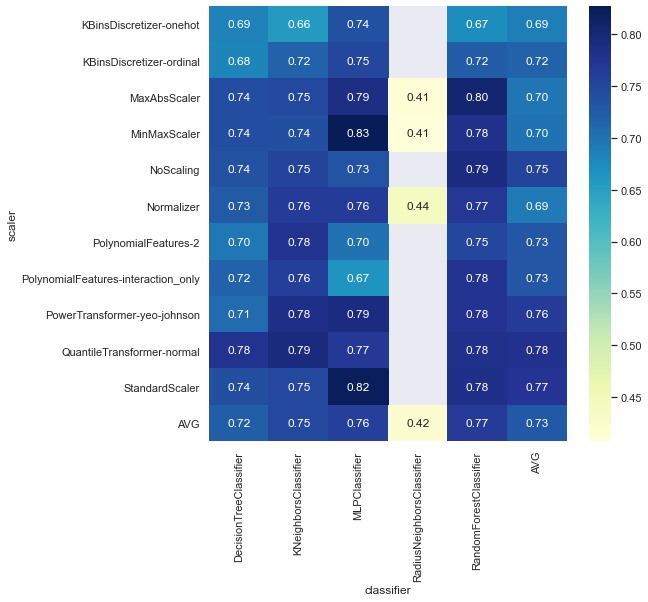

In [16]:
# Image is worth 1024 words. So let's plot!

DataConcatGrpupCVPivot = pd.pivot_table(dfResults, index='scaler', columns='classifier', values='balanced_accuracy',
                                  margins=True, margins_name='AVG')

fig, ax = plt.subplots(figsize=(8,8)) 
ax = sns.heatmap(DataConcatGrpupCVPivot, cmap="YlGnBu", annot=True, fmt=".2f")

## Let's probe preprocessing methods with MLP

In [32]:
### fine tuned pipeline with only MLP
### Scalers

dummyScaller = FunctionTransformer()

preprops = [
    (KBinsDiscretizer(encode='ordinal', n_bins=6), 'KBinsDiscretizer-ordinal'),
    (KBinsDiscretizer(encode='onehot', n_bins=6), 'KBinsDiscretizer-onehot'),
    (PolynomialFeatures(2),'PolynomialFeatures-2'),
    (PolynomialFeatures(interaction_only=True),'PolynomialFeatures-interaction_only'),
    (PowerTransformer(method='box-cox'), "PowerTransformer box-cox"),
]


scalers = [
    (MinMaxScaler(), "MinMaxScaler"),
    (StandardScaler(), "StandardScaler"),
]

### classifiers

classifiers = [
    RandomForestClassifier(),
    MLPClassifier(max_iter=2048,),
]


### classifiers search space


searchSpaceDict = {}

searchSpaceDict["RandomForestClassifier"] = {'randomforestclassifier__n_estimators': [20,50, 100, 120,150, 175, 200, 250, 300],
                                            'randomforestclassifier__max_depth': [None, 5,10,20,30,40,50,80,100,120,200,220,250,300],
                                           'randomforestclassifier__max_features': ["auto", "sqrt", "log2"],}

searchSpaceDict["MLPClassifier"] = {
                            'mlpclassifier__hidden_layer_sizes': [(20,20), (50,50), (50,), (100,),(150,)],
                            'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                            'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'], }

## make the pipelines

pipelinesMatrix = {}

for preprop, prepropDesc in preprops:
    print("+" + prepropDesc)
    for scaler, scalerDesc in scalers:
        prepropFullName = prepropDesc +  "+" + scalerDesc
        pipelinesMatrix[prepropFullName] = {}
        print(" " + scalerDesc) 
        for classifier in classifiers:
            print("            ", classifier.__class__.__name__)
            pipelinesMatrix[prepropFullName][classifier.__class__.__name__] = make_pipeline(preprop, scaler, classifier)

+KBinsDiscretizer-ordinal
 MinMaxScaler
             RandomForestClassifier
             MLPClassifier
 StandardScaler
             RandomForestClassifier
             MLPClassifier
+KBinsDiscretizer-onehot
 MinMaxScaler
             RandomForestClassifier
             MLPClassifier
 StandardScaler
             RandomForestClassifier
             MLPClassifier
+PolynomialFeatures-2
 MinMaxScaler
             RandomForestClassifier
             MLPClassifier
 StandardScaler
             RandomForestClassifier
             MLPClassifier
+PolynomialFeatures-interaction_only
 MinMaxScaler
             RandomForestClassifier
             MLPClassifier
 StandardScaler
             RandomForestClassifier
             MLPClassifier
+PowerTransformer box-cox
 MinMaxScaler
             RandomForestClassifier
             MLPClassifier
 StandardScaler
             RandomForestClassifier
             MLPClassifier


In [33]:
# let's perform cross validation
dfResults = cvAll(X, y, pipelinesMatrix)

---------------------- KBinsDiscretizer-ordinal+MinMaxScaler
     +++++++ RandomForestClassifier
          scores:  [0.72155377 0.65864876 0.67777778 0.78702166 0.87242697 0.70176282
 0.7045177  0.8469697  0.65669516 0.61359428]
             exec time: 0:36:38.163513 2021-01-10 15:58:33.358212
     +++++++ MLPClassifier
          scores:  [0.70940007 0.70054834 0.6453596  0.84583583 0.75108543 0.87532468
 0.16666667 0.7179181  0.7498366  0.63931624]
             exec time: 0:24:49.695816 2021-01-10 16:23:23.054634
---------------------- KBinsDiscretizer-ordinal+StandardScaler
     +++++++ RandomForestClassifier
          scores:  [0.77306822 0.64840067 0.76954157 0.73097944 0.77394958 0.78808923
 0.73280124 0.7616144  0.82162005 0.62349537]
             exec time: 0:35:56.961288 2021-01-10 16:59:20.018276
     +++++++ MLPClassifier
          scores:  [0.62407407 0.61263736 0.71461004 0.78998779 0.81810501 0.73207071
 0.78862434 0.64980507 0.76746032 0.7718254 ]
             exec time: 

In [34]:
# summary of ML alorithms screening, let's save it to the file

dfResults.to_csv("2-results/all-20210103-evaluation_MLP.csv", sep=";")

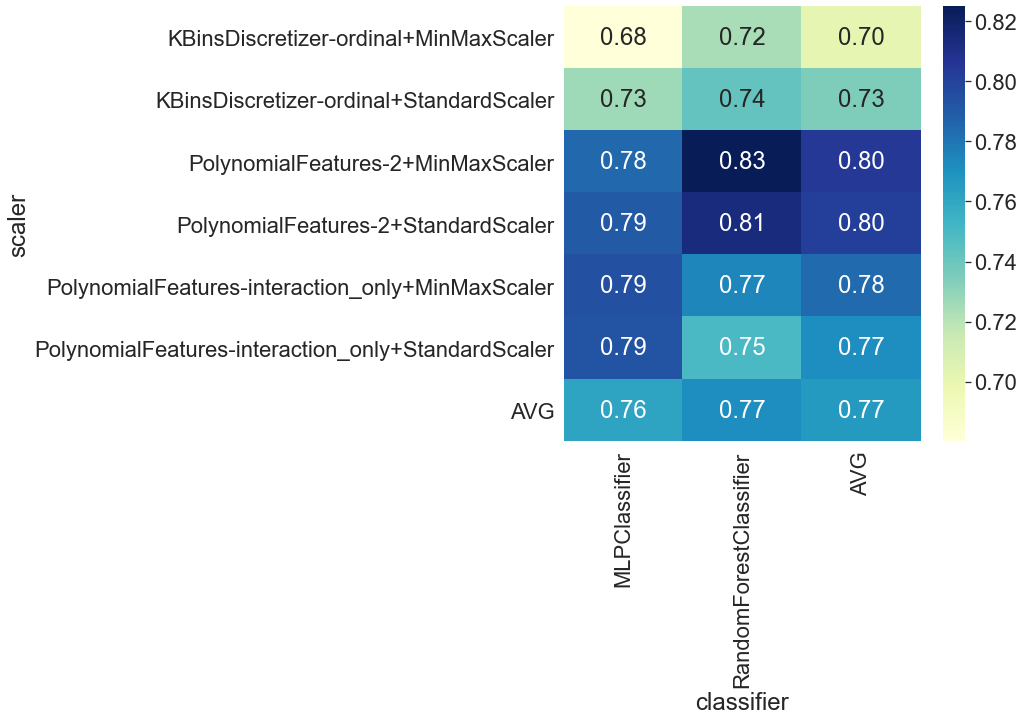

In [35]:
# Image is worth 1024 words. So let's plot!

DataConcatGrpupCVPivot = pd.pivot_table(dfResults, index='scaler', columns='classifier', values='balanced_accuracy',
                                  margins=True, margins_name='AVG')

fig, ax = plt.subplots(figsize=(8,8)) 
ax = sns.heatmap(DataConcatGrpupCVPivot, cmap="YlGnBu", annot=True, fmt=".2f")

### Conclusions

The best parameters so far are:
- MLP + MinMaxScaler
- +PolynomialFeatures-2 + MinMaxScaler + RandomForestClassifier

The first is much more simple, so we will use that one.

# Let's build the models with the best ML methods

- mlp with min-max scaler

In [58]:
# Here we are splitting input data to train and test set.
# default test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [59]:
print("Size of the training set:", len(X_train))
print("Size of the testing set:", len(X_test))

Size of the training set: 180
Size of the testing set: 60


In [60]:
# lets build models with best pipelines

searchSpaceDict = {}
searchSpaceDict["MLPClassifier"] = {
                            'mlpclassifier__hidden_layer_sizes': [(20,), (20,20), (20,20,20), (30,20), (50,50), (50,), (100,),(150,)],
                            'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                            'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'],
#                             'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
#                             'mlpclassifier__momentum': [0, 0.9],
#                             'mlpclassifier__learning_rate_init': [0.01, 0.2],
                            }

scaler = MinMaxScaler()
scalerPoly= PolynomialFeatures(2)
classifier = MLPClassifier(max_iter=20000,)
searchSpace = searchSpaceDict["MLPClassifier"]

# pipeline = make_pipeline(scalerPoly, scaler, classifier)
pipeline = make_pipeline(scaler, classifier)

clf = GridSearchCV(pipeline, searchSpace, scoring='balanced_accuracy', n_jobs=4)

clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('mlpclassifier',
                                        MLPClassifier(max_iter=20000))]),
             n_jobs=4,
             param_grid={'mlpclassifier__activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                         'mlpclassifier__hidden_layer_sizes': [(20,), (20, 20),
                                                               (20, 20, 20),
                                                               (30, 20),
                                                               (50, 50), (50,),
                                                               (100,), (150,)],
                         'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='balanced_accuracy')

In [61]:
# print best params

clf.best_params_

{'mlpclassifier__activation': 'tanh',
 'mlpclassifier__hidden_layer_sizes': (30, 20),
 'mlpclassifier__solver': 'lbfgs'}

In [62]:
# tmake predictions for best params, print score

y_test_pred = clf.best_estimator_.predict(X_test)

clf.best_estimator_.score(X_test, y_test)

0.85

In [63]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_test_pred)}\n")

Classification report for classifier GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('mlpclassifier',
                                        MLPClassifier(max_iter=20000))]),
             n_jobs=4,
             param_grid={'mlpclassifier__activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                         'mlpclassifier__hidden_layer_sizes': [(20,), (20, 20),
                                                               (20, 20, 20),
                                                               (30, 20),
                                                               (50, 50), (50,),
                                                               (100,), (150,)],
                         'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='balanced_accuracy'):
              precision    recall  f1-score   support

  bathroom_d       1

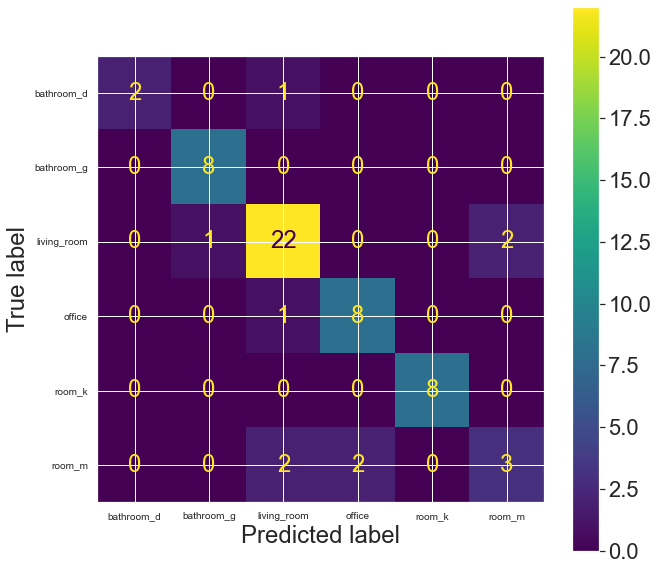

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=2.0) # Adjust to fit
cm = metrics.plot_confusion_matrix(clf, X_test, y_test, ax=ax)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

# Save models for future use

In [65]:
import joblib

In [66]:
filename = '3-models/20200118-MLP.pkl'
joblib.dump(clf.best_estimator_, filename)

['3-models/20200118-MLP.pkl']

In [67]:
# test of the loaded models

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.85


# Reuse saved models for new predictions

In [71]:
import joblib
import numpy as np

def localizeTheCat(rssis):
    # labels = room ids
    labels = loaded_model.classes_.tolist()

    # where is the cat - location
    where_is_a_cat = loaded_model.predict(rssis)[0].tolist()

    # probabilities for each room
    where_is_a_cat_p = loaded_model.predict_proba(rssis)[0].tolist()

    # prediction probability:
    location_p = round(where_is_a_cat_p[labels.index(where_is_a_cat)] * 100, 1)
    return (where_is_a_cat, location_p)


# load models
filename = '3-models/20200118-MLP.pkl'
loaded_model = joblib.load(filename)

In [72]:
# input RSSI array, fetch from the database or file with last measurements
rssis = np.array([[-70, -70, -30, -110]])

# let's make a prediction!
where_is_a_cat, location_p = localizeTheCat(rssis)

# and output the results
print("The cat is in the %s with p=%s%%" % (where_is_a_cat, location_p))

The cat is in the office with p=100.0%


In [73]:
# and this is it! thanks for watching!